In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [32]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [9]:
data_types = {"dataset": "object", 
                       "design": "object",
                        "error": "float64",
                        "exact_result": "int64",
             "filename": "object",
             "mean_approx_result": "int64",
             "query": "int64",
              "result_size": "int64",
              "sampling_rate": "int64",
              "selectivity": "int64"}

In [16]:
uniform_file = "../analysis/out_uniform.csv"
skew_file = "../analysis/out_skew.csv"

In [17]:
uniform_df = pd.read_csv(uniform_file, dtype=data_types, header=0)

In [19]:
skew_df = pd.read_csv(skew_file, dtype=data_types, header=0)

In [114]:
qid = 3
availabilities = [1, 10, 50]
selectivities = [1, -1, 50]
selectivity_str = ["1", "default", "50"]

In [115]:
base_df = uniform_df[uniform_df["query"] == qid][["sampling_rate", "design", "error", "selectivity"]]

In [116]:
width = 0.2
offset = -1 * width
x_locs = np.arange(1, len(selectivities) + 1)
colors = sns.color_palette("colorblind", 3)
designs = plot_df["design"].unique().tolist()

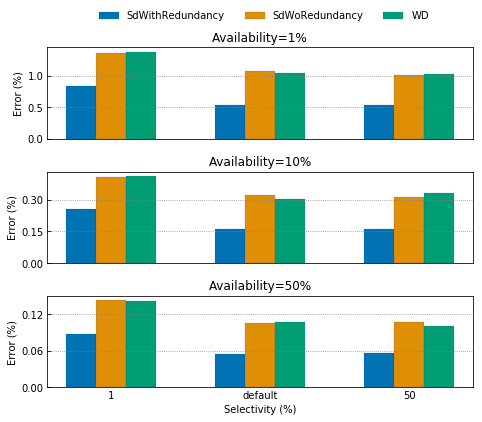

In [136]:
fig, axes = plt.subplots(nrows=len(availabilities), figsize=(6.8, 6), sharex=True)

for a, ax in zip(availabilities, axes): 
    plot_list = []
    plot_df = base_df[base_df["sampling_rate"] == a][["design", "error", "selectivity"]]    
    for d in designs:
        curr_list = []
        for s in selectivities:
            data = plot_df[(plot_df["selectivity"] == s) & (plot_df["design"] == d)]["error"].tolist()
            curr_list.append(data[0])
        plot_list.append(curr_list)

    ax.bar(x_locs + offset, plot_list[0], width, color = colors[0], label = designs[0], edgecolor='b', linewidth=0.1)
    ax.bar(x_locs, plot_list[1], width, color = colors[1], label = designs[1], edgecolor='b', linewidth=0.1)
    ax.bar(x_locs - offset, plot_list[2], width, color = colors[2], label = designs[2], edgecolor='b', linewidth=0.1)

    ax.set_xticks(x_locs)
    ax.tick_params(axis='both', direction='in')
    ax.grid(color='grey', linestyle='dotted', axis='y', which='major')
    ax.tick_params(axis="x", bottom=False)
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(3))
    ax.set_title("Availability=" + str(a) + "%")
    ax.set_ylabel("Error (%)")
    
axes[-1].set_xticklabels(selectivity_str)
axes[0].legend(loc='upper left', ncol=3, bbox_to_anchor=(0.1, 1.5), frameon=False)
axes[-1].set_xlabel("Selectivity (%)")

plt.tight_layout()
plt.show()
plt.close()

In [4]:
data_file = "../variance/results.csv"
data_types = {"combination" : "object",
      "observed variance" : "float64",
      "c-p-s": "float64",
      "c-s-p": "float64",
      "p-c-s": "float64",
      "p-s-c": "float64",
      "s-c-p": "float64",
      "s-p-c": "float64"}
df = pd.read_csv(data_file, dtype=data_types, header=0)

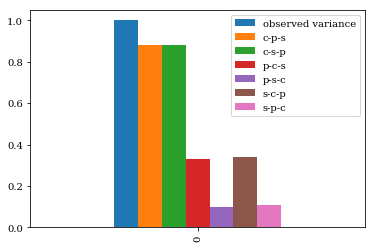

In [9]:
df.head(1).plot(kind='bar')

In [22]:
df.columns[2:].tolist()

['c-p-s', 'c-s-p', 'p-c-s', 'p-s-c', 's-c-p', 's-p-c']